# Real-Estate-Analysis

Analysis of Real Estate Trend in USA in last 10 years from Zillow.com.  Among the factors investigated were the percentage median sale price increases and pattern in the seasonality of number of houses sold during the year.

[Plot1 : Median Sale Price growth over years in U.S](#median)<br/>
[Plot2 : Top 10 states by percentage increase in Median Sale Price from Sept 2011](#plot2)<br/>
[Plot3 : Top 10 metros by size](#plot3)<br/>
[Plot4 : Median Sale Price increase for Cities in Bay area ](#plot4)<br/>
[Plot5 : Home Sale Counts by state - US Map](#plot5)<br/>
[Plot6 : Days On Market  - Seasonality Trend over the years](#plot6)<br/>
[Plot7 :Days On Market trend - Heat Map](#plot7)


In [798]:
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import init_notebook_mode,iplot, plot
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username = 'singuava', api_key = 'Hd6ccbecmOGgaZbsHva2')

init_notebook_mode()
% matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [684]:
#Format function to show numbers morethan 1000 in the ticks in K
def fmt_x(x,y):
    if x >= 1000000:        
        val = int(x) / 1000000
        return '{:.1f}M'.format(val)
    elif x >= 1000:        
        val = int(x) / 1000
        return '{val:d}K'.format(val=int(val))
    else:
        return int(x)

In [804]:
sns.set_context("poster")

In [673]:
df_SalePrice = pd.read_csv("Median Price\Sale_Prices_msa.CSV")
df_SalePrice.head(3)

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,102001,United States,0,188300.0,184800.0,181000.0,177700.0,175800.0,174700.0,173700.0,...,221000.0,224700.0,226600.0,230600.0,233800.0,236400.0,234900.0,230800.0,227700.0,NaN
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,373800.0,380000.0,384100.0,385900.0,387100.0,389400.0,396500.0,399100.0,NaN,NaN
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,472800.0,461900.0,445100.0,435000.0,421000.0,408500.0,392400.0,...,602300.0,612300.0,614300.0,618400.0,623700.0,627400.0,626700.0,621900.0,623500.0,626800.0


## Median Sale Price growth over years in U.S <a class="anchor" id="median"></a>

In [674]:
#Select USA
df_US = df_SalePrice.iloc[0:2:2,1::1]
df_US

,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,0,188300.0,184800.0,181000.0,177700.0,175800.0,174700.0,173700.0,172700.0,...,221000.0,224700.0,226600.0,230600.0,233800.0,236400.0,234900.0,230800.0,227700.0,NaN


In [675]:
df_US.drop(['SizeRank','RegionName'], axis=1, inplace = True)

#transposing into columns
df_US = df_US.transpose()

#Reset index
df_US.reset_index(level=0,inplace=True)

##Name columns
df_US.columns = ['YearMonth','Median_Sales_Price']

##Make a new column Year from YearMonth
df_US['Year']= (df_US['YearMonth'].str.split('-').str[0])
df_US.head()


#Convert median sales price & year to numeric
df_US['Median_Sales_Price'] = df_US['Median_Sales_Price'].apply(pd.to_numeric)
df_US['Year'] = df_US['Year'].apply(pd.to_numeric)

df_US.head(3)

,YearMonth,Median_Sales_Price,Year
0,2008-03,188300.0,2008
1,2008-04,184800.0,2008
2,2008-05,181000.0,2008


In [676]:
##Make a new dataframe groupby year
df_US = df_US.groupby('Year', as_index=False).mean()
df_US.head(5)

,Year,Median_Sales_Price
0,2008,176660.000000
1,2009,157666.666667
2,2010,160258.333333
3,2011,152166.666667
4,2012,157133.333333


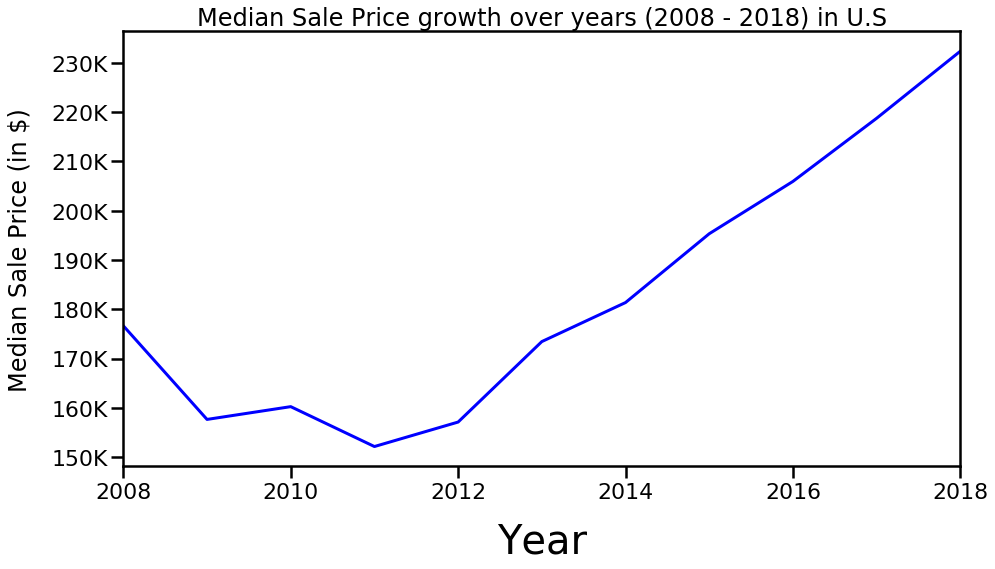

In [821]:
ax=df_US.plot(kind='line', x="Year", figsize=(15,8), color='blue')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Year", labelpad=20, fontsize = 40)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Sale Price growth over years (2008 - 2018) in U.S")
ax.legend_.remove()
plt.show()

In [ ]:
Hence we like to investigate further to see how the various states fared in terms of the median house price increase.

##  Median Sale Price Increase By State <a class="anchor" id="plot2"></a>

In [690]:
df_SalePrice_State = pd.read_csv("Median Price\Sale_Prices_State.CSV")
df_SalePrice_State.head(3)

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,9,California,1,387800.0,370900.0,348000.0,332700.0,317800.0,305500.0,291500.0,...,466200.0,471600.0,472600.0,475000.0,479100.0,483100.0,487800.0,487100.0,487200.0,485800.0
1,54,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213000.0,212400.0,211600.0,211300.0,213400.0,215200.0,216300.0,216900.0,218100.0,NaN
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286700.0,295300.0,303000.0,308000.0,305100.0,298600.0,295600.0,288100.0,NaN,NaN


In [807]:
df_state = df_SalePrice_State.iloc[0:,1::6]

df_state.set_index('RegionName').head()

,2008-07,2009-01,2009-07,2010-01,2010-07,2011-01,2011-07,2012-01,2012-07,2013-01,...,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
California,317800.0,243000.0,230600.0,263000.0,266800.0,255400.0,243900.0,246600.0,271600.0,309600.0,...,369200.0,379700.0,387000.0,401900.0,418900.0,422600.0,439100.0,459700.0,475000.0,485800.0
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,173700.0,179800.0,186000.0,187200.0,194200.0,200400.0,204600.0,211300.0,NaN
New York,NaN,NaN,NaN,NaN,NaN,246800.0,258000.0,226000.0,247600.0,252300.0,...,263800.0,261500.0,260100.0,262700.0,267900.0,280400.0,279300.0,291600.0,308000.0,NaN
Florida,184300.0,150900.0,126100.0,130300.0,120600.0,115100.0,116000.0,120400.0,125700.0,135900.0,...,151600.0,154100.0,161800.0,171700.0,180200.0,187000.0,195600.0,203000.0,220500.0,NaN
Illinois,181100.0,174200.0,152100.0,171500.0,158800.0,156200.0,141000.0,138700.0,140100.0,143800.0,...,169600.0,168500.0,176000.0,181800.0,178500.0,185400.0,190500.0,192400.0,194600.0,NaN


In [808]:
##Calculate Min and Max of the series
df_state['Min'] = df_state.min(axis=1)
df_state['Max'] = df_state.max(axis=1)

##Calculate Diff of Min and Max
df_state['Diff'] = df_state['Max'] - df_state['Min']

##Calculate Percentage increase from the rock bottom in 2011
df_state['PctChange'] = (df_state['Diff']/df_state['Min'])*100

## Sort Values by percentage increase
df_state.sort_values(by='PctChange').head()

,RegionName,2008-07,2009-01,2009-07,2010-01,2010-07,2011-01,2011-07,2012-01,2012-07,...,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07,Min,Max,Diff,PctChange
38,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,297600.0,287700.0,291400.0,284300.0,306900.0,NaN,284300.0,306900.0,22600.0,7.949349
28,Connecticut,236300.0,231700.0,215600.0,238000.0,223800.0,253900.0,229200.0,224400.0,226400.0,...,220200.0,221600.0,229100.0,225700.0,241100.0,NaN,215600.0,253900.0,38300.0,17.764378
10,New Jersey,305100.0,292000.0,273900.0,272100.0,274900.0,274600.0,269100.0,257000.0,266500.0,...,276100.0,276000.0,280100.0,271600.0,276800.0,NaN,257000.0,305100.0,48100.0,18.715953
1,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187200.0,194200.0,200400.0,204600.0,211300.0,NaN,173700.0,211300.0,37600.0,21.646517
11,Virginia,232900.0,218200.0,215200.0,227600.0,220900.0,225600.0,213900.0,213200.0,230800.0,...,244200.0,248300.0,252700.0,257200.0,259700.0,NaN,213200.0,259700.0,46500.0,21.810507


In [693]:
df_top10 = df_state.sort_values(by='PctChange').tail(10)
df_top10 = df_top10.ix[:, ['RegionName','PctChange']]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [694]:
df_top10.set_index('RegionName')

,PctChange
RegionName,
Tennessee,63.805970
West Virginia,66.920566
Oregon,75.013492
Georgia,87.837838
Florida,91.572546
Colorado,91.716621
California,110.667823
Arizona,110.880829
Nevada,128.381963


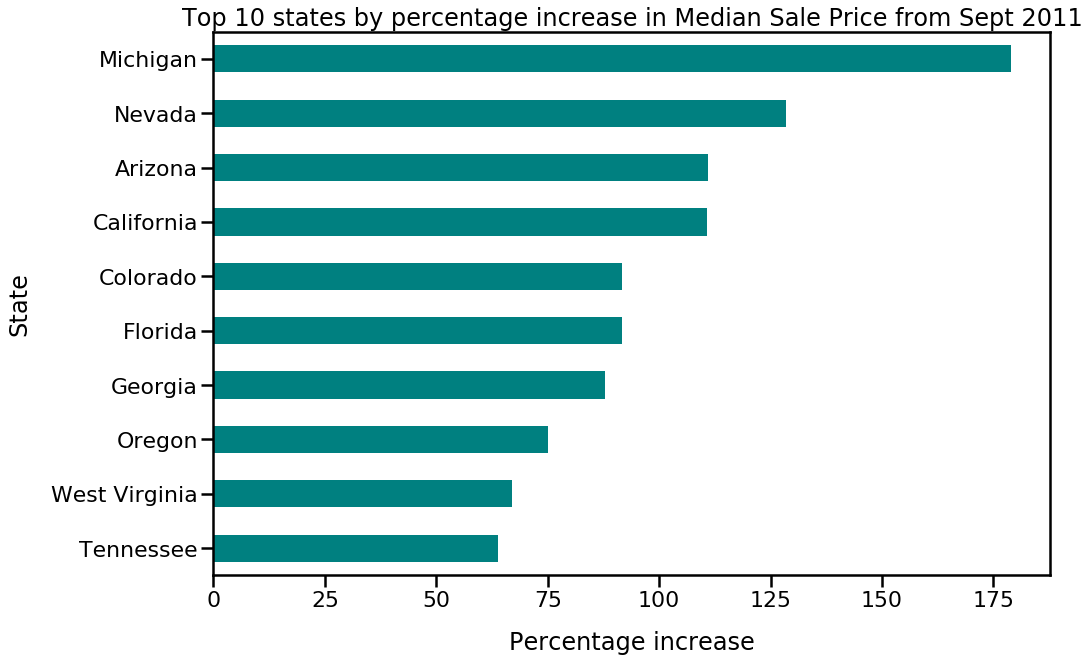

In [696]:
sns.set_context("poster")
ax = df_top10.plot(kind='barh',x='RegionName', figsize=(15, 10), rot=0, color='Teal')
ax.xaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Percentage increase", labelpad=20)
plt.ylabel("State", labelpad=20)
plt.title("Top 10 states by percentage increase in Median Sale Price from Sept 2011")
ax.legend_.remove()
plt.show()

## Top 10 metros by size <a class="anchor" id="plot3"></a>

In [697]:
df_SalePrice_City = pd.read_csv("Median Price\Sale_Prices_City.CSV")
df_SalePrice_City.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,6181.0,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,546500.0,546000.0,552100.0,565700.0,572600.0,574800.0,569500.0,567100.0,556200.0,552900.0
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
3,13271.0,Philadelphia,Pennsylvania,4,113100.0,113200.0,113500.0,110300.0,108600.0,112100.0,...,143700.0,146500.0,149800.0,156700.0,154700.0,154900.0,152400.0,154600.0,153000.0,NaN
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0


In [698]:
df_SalePrice_Cities = df_SalePrice_City.sort_values(by="SizeRank").head(10)
df_SalePrice_City.dropna(axis=0, inplace=True)
df_SalePrice_City.head(5)

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0
7,54296.0,San Diego,California,8,419800.0,408200.0,398800.0,380600.0,371300.0,356600.0,...,553600.0,566300.0,574300.0,577800.0,572000.0,573200.0,577600.0,583200.0,584200.0,585000.0
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0


In [700]:
#Select subset of columns
df_Cities_6mon = df_SalePrice_Cities.iloc[0:,1::6]
df_Cities_6mon.head()

,RegionName,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
0,New York,NaN,NaN,NaN,NaN,NaN,449900.0,463500.0,438900.0,470600.0,...,482800.0,491600.0,490700.0,524600.0,540400.0,540900.0,543900.0,544000.0,552100.0,556200.0
1,Los Angeles,449200.0,374700.0,323100.0,354400.0,347000.0,364500.0,343600.0,333200.0,341700.0,...,484400.0,504400.0,510900.0,532300.0,563200.0,578400.0,605600.0,629700.0,672200.0,688000.0
2,Chicago,282100.0,264000.0,231200.0,242200.0,231200.0,215200.0,194000.0,194600.0,196000.0,...,251500.0,259300.0,268300.0,272200.0,257800.0,269800.0,281500.0,276400.0,275000.0,277800.0
3,Philadelphia,110300.0,110300.0,113600.0,126400.0,120000.0,105600.0,111300.0,103800.0,108200.0,...,117500.0,119200.0,119600.0,123400.0,124600.0,127900.0,131500.0,145900.0,149800.0,153000.0
4,Phoenix,198300.0,122600.0,82300.0,105000.0,105500.0,84600.0,82300.0,98800.0,122000.0,...,164400.0,162500.0,175100.0,190000.0,198300.0,205100.0,212400.0,214700.0,230100.0,237000.0


In [701]:
df_Cities_6mon.set_index('RegionName')

,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,2012-12,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
RegionName,,,,,,,,,,,,,,,,,,,,,
New York,NaN,NaN,NaN,NaN,NaN,449900.0,463500.0,438900.0,470600.0,492300.0,...,482800.0,491600.0,490700.0,524600.0,540400.0,540900.0,543900.0,544000.0,552100.0,556200.0
Los Angeles,449200.0,374700.0,323100.0,354400.0,347000.0,364500.0,343600.0,333200.0,341700.0,400400.0,...,484400.0,504400.0,510900.0,532300.0,563200.0,578400.0,605600.0,629700.0,672200.0,688000.0
Chicago,282100.0,264000.0,231200.0,242200.0,231200.0,215200.0,194000.0,194600.0,196000.0,203800.0,...,251500.0,259300.0,268300.0,272200.0,257800.0,269800.0,281500.0,276400.0,275000.0,277800.0
Philadelphia,110300.0,110300.0,113600.0,126400.0,120000.0,105600.0,111300.0,103800.0,108200.0,111500.0,...,117500.0,119200.0,119600.0,123400.0,124600.0,127900.0,131500.0,145900.0,149800.0,153000.0
Phoenix,198300.0,122600.0,82300.0,105000.0,105500.0,84600.0,82300.0,98800.0,122000.0,142800.0,...,164400.0,162500.0,175100.0,190000.0,198300.0,205100.0,212400.0,214700.0,230100.0,237000.0
Las Vegas,230000.0,166100.0,120500.0,121500.0,128700.0,115500.0,108700.0,105700.0,116700.0,133200.0,...,166400.0,163800.0,178900.0,186800.0,192300.0,200100.0,207200.0,225400.0,237400.0,264000.0
San Antonio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,163100.0,165900.0,170800.0,177800.0,176100.0,181300.0,178600.0,199500.0,192000.0
San Diego,380600.0,308200.0,308400.0,350200.0,343500.0,359200.0,336900.0,330100.0,355000.0,389800.0,...,435800.0,445600.0,464500.0,475900.0,489500.0,505300.0,522800.0,537400.0,574300.0,584200.0
Dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,249700.0,250300.0,255400.0,258000.0,268400.0,275300.0,281200.0,281900.0,287700.0


In [702]:
## Transpose
df_cities_T = df_Cities_6mon.set_index('RegionName').T
df_cities_T.head()

RegionName,New York,Los Angeles,Chicago,Philadelphia,Phoenix,Las Vegas,San Antonio,San Diego,Dallas,San Jose
2008-06,NaN,449200.0,282100.0,110300.0,198300.0,230000.0,NaN,380600.0,NaN,543300.0
2008-12,NaN,374700.0,264000.0,110300.0,122600.0,166100.0,NaN,308200.0,NaN,428300.0
2009-06,NaN,323100.0,231200.0,113600.0,82300.0,120500.0,NaN,308400.0,NaN,366700.0
2009-12,NaN,354400.0,242200.0,126400.0,105000.0,121500.0,NaN,350200.0,NaN,448600.0
2010-06,NaN,347000.0,231200.0,120000.0,105500.0,128700.0,NaN,343500.0,NaN,446400.0


In [709]:
df_cities_T = df_cities_T.dropna()
df_cities_T.head()

RegionName,New York,Los Angeles,Chicago,Philadelphia,Phoenix,Las Vegas,San Antonio,San Diego,Dallas,San Jose
2014-06,491600.0,504400.0,259300.0,119200.0,162500.0,163800.0,163100.0,445600.0,249700.0,640200.0
2014-12,490700.0,510900.0,268300.0,119600.0,175100.0,178900.0,165900.0,464500.0,250300.0,669100.0
2015-06,524600.0,532300.0,272200.0,123400.0,190000.0,186800.0,170800.0,475900.0,255400.0,705300.0
2015-12,540400.0,563200.0,257800.0,124600.0,198300.0,192300.0,177800.0,489500.0,258000.0,738400.0
2016-06,540900.0,578400.0,269800.0,127900.0,205100.0,200100.0,176100.0,505300.0,268400.0,760300.0


In [713]:
##Reset index
df_cities_T.reset_index(level=0,inplace=True)

##Name columns
df_cities_T.columns = ['YearMonth','New York', 'Los Angeles', 'Chicago', 'Philadelphia', 'Phoenix','Las Vegas', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

#Extract Month and Year into separate columns
df_cities_T['Year']= (df_cities_T['YearMonth'].str.split('-').str[0])
df_cities_T['Month']= (df_cities_T['YearMonth'].str.split('-').str[1])

df_cities_T['MonthName']=df_cities_T['Month'].apply(lambda x: 'Jun' if x == '06' else 'Dec')
df_cities_T['Yr']=df_cities_T['Year'].apply(lambda x: '\''+x[-2:])
df_cities_T['MonthYr']=df_cities_T['MonthName'] +' '+ df_cities_T['Yr']

In [715]:
df_cities_T.head()

,YearMonth,New York,Los Angeles,Chicago,Philadelphia,Phoenix,Las Vegas,San Antonio,San Diego,Dallas,San Jose,Year,Month,MonthName,Yr,MonthYr
0,2014-06,491600.0,504400.0,259300.0,119200.0,162500.0,163800.0,163100.0,445600.0,249700.0,640200.0,2014,06,Jun,'14,Jun '14
1,2014-12,490700.0,510900.0,268300.0,119600.0,175100.0,178900.0,165900.0,464500.0,250300.0,669100.0,2014,12,Dec,'14,Dec '14
2,2015-06,524600.0,532300.0,272200.0,123400.0,190000.0,186800.0,170800.0,475900.0,255400.0,705300.0,2015,06,Jun,'15,Jun '15
3,2015-12,540400.0,563200.0,257800.0,124600.0,198300.0,192300.0,177800.0,489500.0,258000.0,738400.0,2015,12,Dec,'15,Dec '15
4,2016-06,540900.0,578400.0,269800.0,127900.0,205100.0,200100.0,176100.0,505300.0,268400.0,760300.0,2016,06,Jun,'16,Jun '16


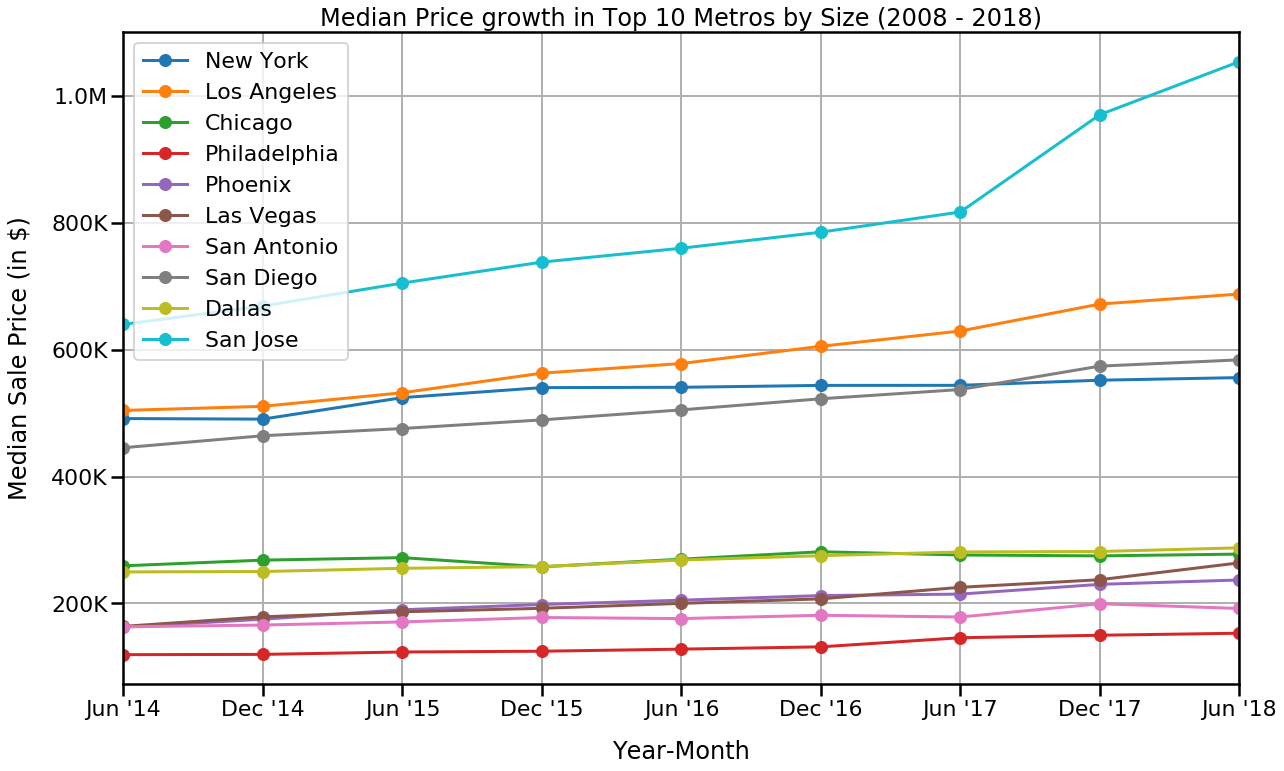

In [716]:
ax=df_cities_T.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Year-Month", labelpad=20)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Price growth in Top 10 Metros by Size (2008 - 2018)")
plt.show()

## Median Sale Price increase for Cities in Bay area (San Jose, San Francisco & Santa Clara)<a class="anchor" id="plot4"></a>

In [753]:
df_SalePrice_City.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
1,12447.0,Los Angeles,California,2,508700.0,480000.0,459500.0,449200.0,432600.0,419400.0,...,647500.0,663500.0,672200.0,687000.0,696900.0,704600.0,695900.0,685900.0,688000.0,684800.0
2,17426.0,Chicago,Illinois,3,324300.0,313100.0,291700.0,282100.0,277400.0,273700.0,...,267900.0,271400.0,275000.0,280700.0,286400.0,299400.0,298500.0,293100.0,277800.0,272500.0
4,40326.0,Phoenix,Arizona,5,220900.0,213000.0,206600.0,198300.0,187700.0,177100.0,...,223100.0,226000.0,230100.0,236800.0,239400.0,238200.0,235800.0,233700.0,237000.0,237900.0
7,54296.0,San Diego,California,8,419800.0,408200.0,398800.0,380600.0,371300.0,356600.0,...,553600.0,566300.0,574300.0,577800.0,572000.0,573200.0,577600.0,583200.0,584200.0,585000.0
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0


In [812]:
df_SalePrice_City1 = pd.read_csv("Median Price\Sale_Prices_City.CSV")

In [813]:
df_BayArea = df_SalePrice_City1[(df_SalePrice_City['RegionName']=='Santa Clara') | (df_SalePrice_City1['RegionName']=='San Jose') | (df_SalePrice_City1['RegionName']=='San Francisco')]
df_BayArea

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
9,33839.0,San Jose,California,10,615200.0,578200.0,560700.0,543300.0,529300.0,517700.0,...,885300.0,922800.0,970900.0,1002300.0,1044300.0,1060800.0,1071700.0,1065200.0,1054600.0,1030600.0
11,20330.0,San Francisco,California,12,792500.0,784400.0,782400.0,779000.0,787300.0,793600.0,...,1282800.0,1290600.0,1287900.0,1291100.0,1288100.0,1307000.0,1318200.0,1327100.0,1316400.0,NaN
170,13713.0,Santa Clara,California,171,586300.0,581300.0,575200.0,600700.0,611200.0,620700.0,...,1166700.0,1211000.0,1255200.0,1300200.0,1352900.0,1355300.0,1382300.0,1324100.0,1304400.0,1307000.0


In [814]:
##Subset columns
df_BayArea = df_BayArea.iloc[0:,1::6]
df_BayArea

,RegionName,2008-06,2008-12,2009-06,2009-12,2010-06,2010-12,2011-06,2011-12,2012-06,...,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12,2018-06
9,San Jose,543300.0,428300.0,366700.0,448600.0,446400.0,448600.0,422500.0,422600.0,450200.0,...,616700.0,640200.0,669100.0,705300.0,738400.0,760300.0,785600.0,817400.0,970900.0,1054600.0
11,San Francisco,779000.0,704300.0,666400.0,713700.0,670000.0,686300.0,660700.0,654700.0,695700.0,...,869400.0,929000.0,1026100.0,1135600.0,1150800.0,1157100.0,1206500.0,1203100.0,1287900.0,1316400.0
170,Santa Clara,600700.0,539800.0,495800.0,579900.0,519200.0,549700.0,508300.0,536100.0,564600.0,...,700500.0,696900.0,753500.0,845700.0,904800.0,926500.0,968800.0,1042900.0,1255200.0,1304400.0


In [815]:
df_BayArea_T = df_BayArea.set_index('RegionName').T
df_BayArea_T.head()

RegionName,San Jose,San Francisco,Santa Clara
2008-06,543300.0,779000.0,600700.0
2008-12,428300.0,704300.0,539800.0
2009-06,366700.0,666400.0,495800.0
2009-12,448600.0,713700.0,579900.0
2010-06,446400.0,670000.0,519200.0


In [816]:
##Reset index
df_BayArea_T.reset_index(level=0,inplace=True)

In [817]:
##Name columns
df_BayArea_T.columns = ['YearMonth','San Jose', 'San Francisco', 'Santa Clara']

In [818]:
df_BayArea_T['Year']= (df_BayArea_T['YearMonth'].str.split('-').str[0])
df_BayArea_T['Month']= (df_BayArea_T['YearMonth'].str.split('-').str[1])

df_BayArea_T['MonthName']=df_BayArea_T['Month'].apply(lambda x: 'Jun' if x == '06' else 'Dec')
df_BayArea_T['Yr']=df_BayArea_T['Year'].apply(lambda x: '\''+x[-2:])
df_BayArea_T['MonthYr']=df_BayArea_T['MonthName'] +' '+ df_BayArea_T['Yr']

In [819]:
df_BayArea_T.head()

,YearMonth,San Jose,San Francisco,Santa Clara,Year,Month,MonthName,Yr,MonthYr
0,2008-06,543300.0,779000.0,600700.0,2008,06,Jun,'08,Jun '08
1,2008-12,428300.0,704300.0,539800.0,2008,12,Dec,'08,Dec '08
2,2009-06,366700.0,666400.0,495800.0,2009,06,Jun,'09,Jun '09
3,2009-12,448600.0,713700.0,579900.0,2009,12,Dec,'09,Dec '09
4,2010-06,446400.0,670000.0,519200.0,2010,06,Jun,'10,Jun '10


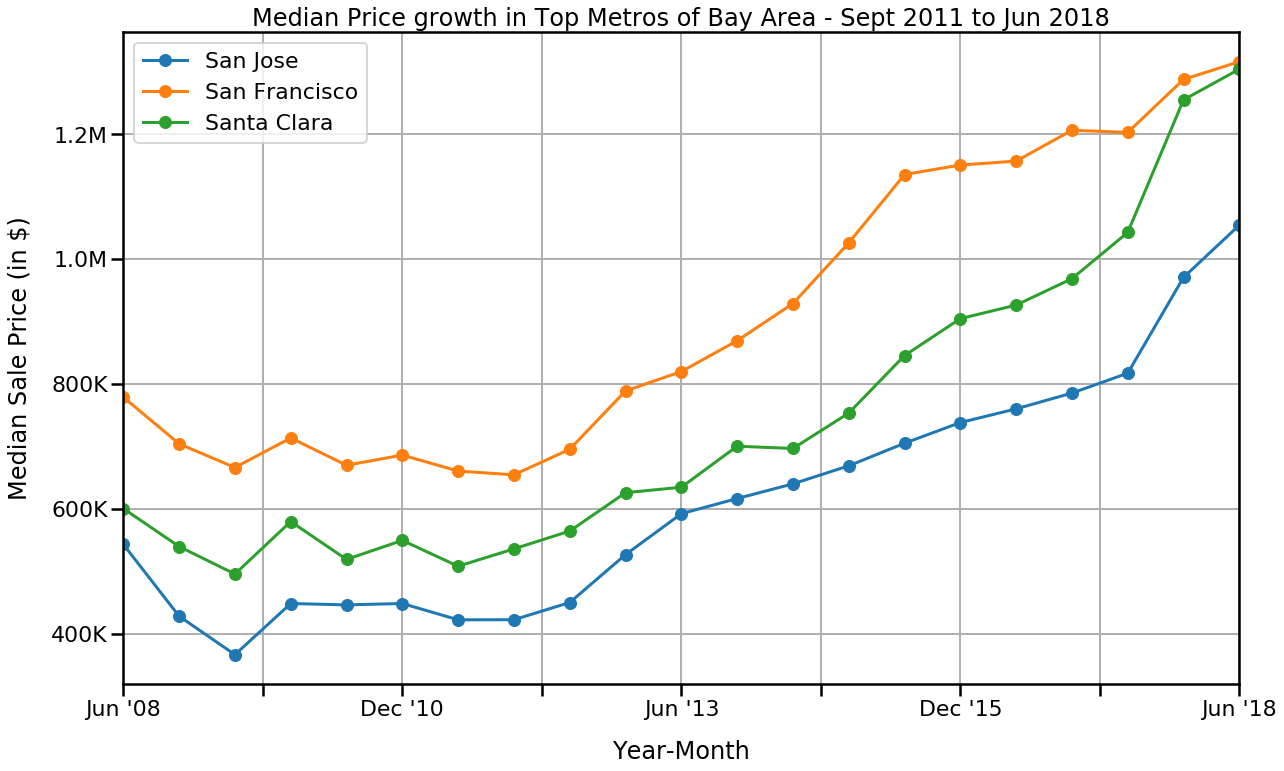

In [820]:
sns.set_context("poster")
ax=df_BayArea_T.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Year-Month", labelpad=20)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Price growth in Top Metros of Bay Area - Sept 2011 to Jun 2018")    
plt.show()    

## Home Sale Counts by state - US Map <a class="anchor" id="plot5"></a>

In [748]:
df_Counts_State = pd.read_csv("Home Sale Counts\Sale_Counts_State.CSV")
df_Counts_State.head()

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,9,California,1,23518.0,28536.0,31373.0,33071.0,36669.0,35316.0,36477.0,...,41189,37759,36593,29333,29312,39767,40783,44718,44630.0,43208.0
1,54,Texas,2,23774.0,25876.0,26542.0,27791.0,28239.0,25213.0,21392.0,...,32804,28839,29941,24783,25329,31152,32593,38935,39184.0,NaN
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19289,17409,17860,16239,13335,14014,14461,17680,NaN,NaN
3,14,Florida,4,17429.0,19501.0,19766.0,20462.0,20923.0,17640.0,17759.0,...,38908,36071,40928,36048,34492,45172,46433,49560,48507.0,NaN
4,21,Illinois,5,11823.0,13158.0,13967.0,15312.0,16499.0,15070.0,14189.0,...,19981,18048,17525,14702,12155,17074,19639,23725,27333.0,NaN


In [749]:
df_Counts_State = df_Counts_State.drop(['RegionID','SizeRank'], axis=1)
df_Counts_State['Avg'] = df_Counts_State.mean(axis=1)
df_Counts_State.head()

,RegionName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,Avg
0,California,23518.0,28536.0,31373.0,33071.0,36669.0,35316.0,36477.0,38863.0,29342.0,...,37759,36593,29333,29312,39767,40783,44718,44630.0,43208.0,36122.296000
1,Texas,23774.0,25876.0,26542.0,27791.0,28239.0,25213.0,21392.0,21819.0,15415.0,...,28839,29941,24783,25329,31152,32593,38935,39184.0,NaN,25739.443548
2,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17409,17860,16239,13335,14014,14461,17680,NaN,NaN,13604.477778
3,Florida,17429.0,19501.0,19766.0,20462.0,20923.0,17640.0,17759.0,18072.0,13673.0,...,36071,40928,36048,34492,45172,46433,49560,48507.0,NaN,31568.653226
4,Illinois,11823.0,13158.0,13967.0,15312.0,16499.0,15070.0,14189.0,13581.0,9376.0,...,18048,17525,14702,12155,17074,19639,23725,27333.0,NaN,15204.161290


In [765]:
df_state_MeanCount = df_Counts_State.ix[:, ['RegionName','Avg']]

In [766]:
df_state_MeanCount.head()

,RegionName,Avg
0,California,36122.296000
1,Texas,25739.443548
2,New York,13604.477778
3,Florida,31568.653226
4,Illinois,15204.161290


In [823]:
import plotly.plotly as py
import plotly as ply
import pandas as pd

#for col in df_persqft_state.columns:
 #   df_persqft_state['Increase'] = df_persqft_state['Diff'].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


df_state_MeanCount['text'] = df_state_MeanCount['RegionName'] + '<br>' +\
    'Avg Count: '+df_state_MeanCount['Avg'].astype(str)
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_state_MeanCount['RegionName'],
        z = df_state_MeanCount['Avg'].astype(float),
        locationmode = 'USA-states',
        text = df_state_MeanCount['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avg Count")
        ) ]


layout = dict(
        title = 'Avg Count of Houses Sold Monthly (2010 - 2018)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
#ply.tools.set_credentials_file(username='singuava', api_key='k4gITYpzzdFXRtcEcahg')
 
#Click anywhere on the image below to be taken to plotly page with this plot

<div>
    <a href="https://plot.ly/~singuava/8/?share_key=t42budrsWYDdGzeUXaF7fS" target="_blank" title="Avg HousesSold - 2" style="display: block; text-align: center;"><img src="https://plot.ly/~singuava/8.png?share_key=t42budrsWYDdGzeUXaF7fS" alt="Avg HousesSold - 2" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="singuava:8" sharekey-plotly="t42budrsWYDdGzeUXaF7fS" src="https://plot.ly/embed.js" async></script>
</div>

## Days On Market  - Seasonality Trend over the years  <a class="anchor" id="plot6"></a>

In [768]:
df_age = pd.read_csv("Inventory\AgeOfInventory_Metro_Public.CSV")
df_age.head(3)

,RegionName,RegionType,StateFullName,DataTypeDescription,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,Country,NaN,All Homes,119,114,102,84,78,80,...,81,85,92,98,91,67,60,57,58,62
1,"New York, NY",Msa,New York,All Homes,136,126,112,86,81,86,...,82,84,92,99,78,51,55,53,58,66
2,"Chicago, IL",Msa,Illinois,All Homes,140,135,122,98,88,88,...,78,86,98,105,88,50,46,50,54,60


In [769]:
df_age = df_age[(df_age['RegionName']=='San Francisco, CA')  | (df_age['RegionName']=='United States')]

In [770]:
df_age

,RegionName,RegionType,StateFullName,DataTypeDescription,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,Country,NaN,All Homes,119,114,102,84,78,80,...,81,85,92,98,91,67,60,57,58,62
10,"San Francisco, CA",Msa,California,All Homes,82,60,42,39,35,40,...,25,34,46,26,15,14,14,15,20,24


In [771]:
df_age = df_age.drop(['RegionType','StateFullName','DataTypeDescription'], axis=1)
df_age.head()

,RegionName,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,United States,119,114,102,84,78,80,86,91,94,...,81,85,92,98,91,67,60,57,58,62
10,"San Francisco, CA",82,60,42,39,35,40,38,40,36,...,25,34,46,26,15,14,14,15,20,24


In [772]:
df_age_T = df_age.set_index('RegionName').T
df_age_T.reset_index(level=0,inplace=True)
df_age_T.head()

RegionName,index,United States,"San Francisco, CA"
0,2012-01,119,82
1,2012-02,114,60
2,2012-03,102,42
3,2012-04,84,39
4,2012-05,78,35


In [773]:
##Name columns
df_age_T.columns = ['YearMonth','United States', 'San Francisco, CA']

In [775]:
##Make a new column Year from YearMonth
df_age_T['Year']= (df_age_T['YearMonth'].str.split('-').str[0])
df_age_T['Month']= (df_age_T['YearMonth'].str.split('-').str[1])
df_age_T.head()

,YearMonth,United States,"San Francisco, CA",Year,Month
0,2012-01,119,82,2012,01
1,2012-02,114,60,2012,02
2,2012-03,102,42,2012,03
3,2012-04,84,39,2012,04
4,2012-05,78,35,2012,05


In [776]:
df_age_T_2017 = df_age_T[(df_age_T['Year'].astype(int) < 2018)]
df_age_T_2017.head()

,YearMonth,United States,"San Francisco, CA",Year,Month
0,2012-01,119,82,2012,01
1,2012-02,114,60,2012,02
2,2012-03,102,42,2012,03
3,2012-04,84,39,2012,04
4,2012-05,78,35,2012,05


In [777]:
Month_to_MonthName = { '01' : 'Jan', 
                  '02' : 'Feb', 
                  '03' : 'Mar', 
                  '04' : 'Apr', 
                  '05' : 'May',
                  '06' : 'Jun', 
                  '07' : 'Jul', 
                  '08' : 'Aug', 
                  '09' : 'Sep', 
                  '10' : 'Oct',
                  '11' : 'Nov', 
                  '12' : 'Dec'}

In [778]:
df_age_T_2017['MonthName'] = df_age_T_2017['Month'].map(Month_to_MonthName)
df_age_T_2017['Yr']=df_age_T_2017['Year'].apply(lambda x: '\''+x[-2:])
df_age_T_2017['MonthYr']=df_age_T_2017['MonthName'] +' '+ df_age_T_2017['Yr']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [779]:
df_age_T_2017.head()

,YearMonth,United States,"San Francisco, CA",Year,Month,MonthName,Yr,MonthYr
0,2012-01,119,82,2012,01,Jan,'12,Jan '12
1,2012-02,114,60,2012,02,Feb,'12,Feb '12
2,2012-03,102,42,2012,03,Mar,'12,Mar '12
3,2012-04,84,39,2012,04,Apr,'12,Apr '12
4,2012-05,78,35,2012,05,May,'12,May '12


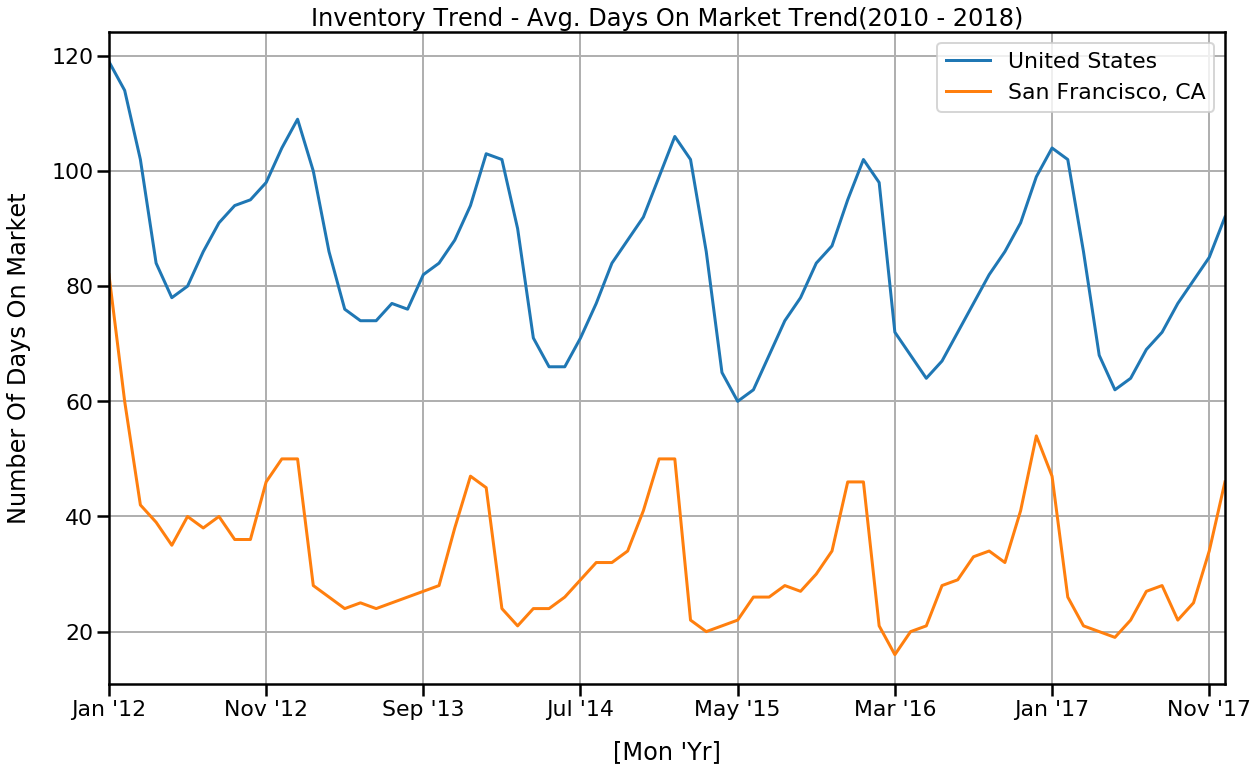

In [780]:
sns.set_context("poster")
ax=df_age_T_2017.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True)
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("[Mon 'Yr]", labelpad=20)
plt.ylabel("Number Of Days On Market", labelpad=20)
plt.title("Inventory Trend - Avg. Days On Market Trend(2010 - 2018)")
plt.show()

In [781]:
df_age_T_2yrs = df_age_T[(df_age_T['Year']=='2017')]

In [782]:
df_age_T_2yrs['MonthName'] =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [783]:
df_age_T_2yrs.head()

,YearMonth,United States,"San Francisco, CA",Year,Month,MonthName
60,2017-01,104,47,2017,01,Jan
61,2017-02,102,26,2017,02,Feb
62,2017-03,86,21,2017,03,Mar
63,2017-04,68,20,2017,04,Apr
64,2017-05,62,19,2017,05,May


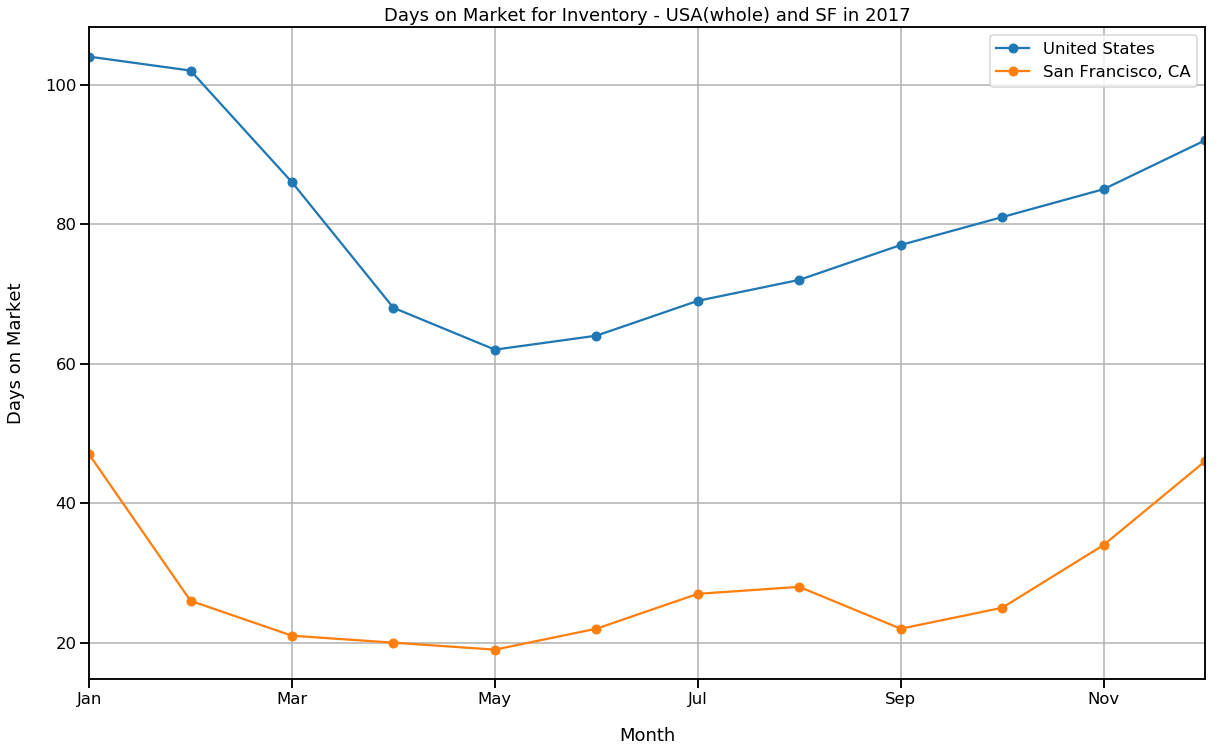

In [784]:
sns.set_context("talk")
ax=df_age_T_2yrs.plot(kind='line', figsize=(20,12),x='MonthName', grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Month", labelpad=20)
plt.ylabel("Days on Market", labelpad=20)
plt.title("Days on Market for Inventory - USA(whole) and SF in 2017")
plt.show()

In [785]:
df_DOM_US = df_age_T.ix[:, ['Year', 'Month','United States']]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [786]:
df_DOM_US.head()

,Year,Month,United States
0,2012,01,119
1,2012,02,114
2,2012,03,102
3,2012,04,84
4,2012,05,78


In [796]:
df_DOM_US_2017 = df_DOM_US[(df_DOM_US['Year'].astype(int) < 2018)]
df_DOM_US_idx = df_DOM_US_2017.set_index(['Year','Month'])
dfDOMbyYrMon = df_DOM_US_idx.unstack(level=0)
dfDOMbyYrMon.head()

United States                         
Year           2012 2013 2014 2015 2016 2017
Month                                       
01              119  109  103  106  102  104
02              114  100  102  102   98  102
03              102   86   90   86   72   86
04               84   76   71   65   68   68
05               78   74   66   60   64   62

In [788]:
month_short_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
year_short_names = ['2012', '2013', '2014', '2015', '2016', '2017']

## Days On Market trend - Heat Map <a class="anchor" id="plot7"></a>

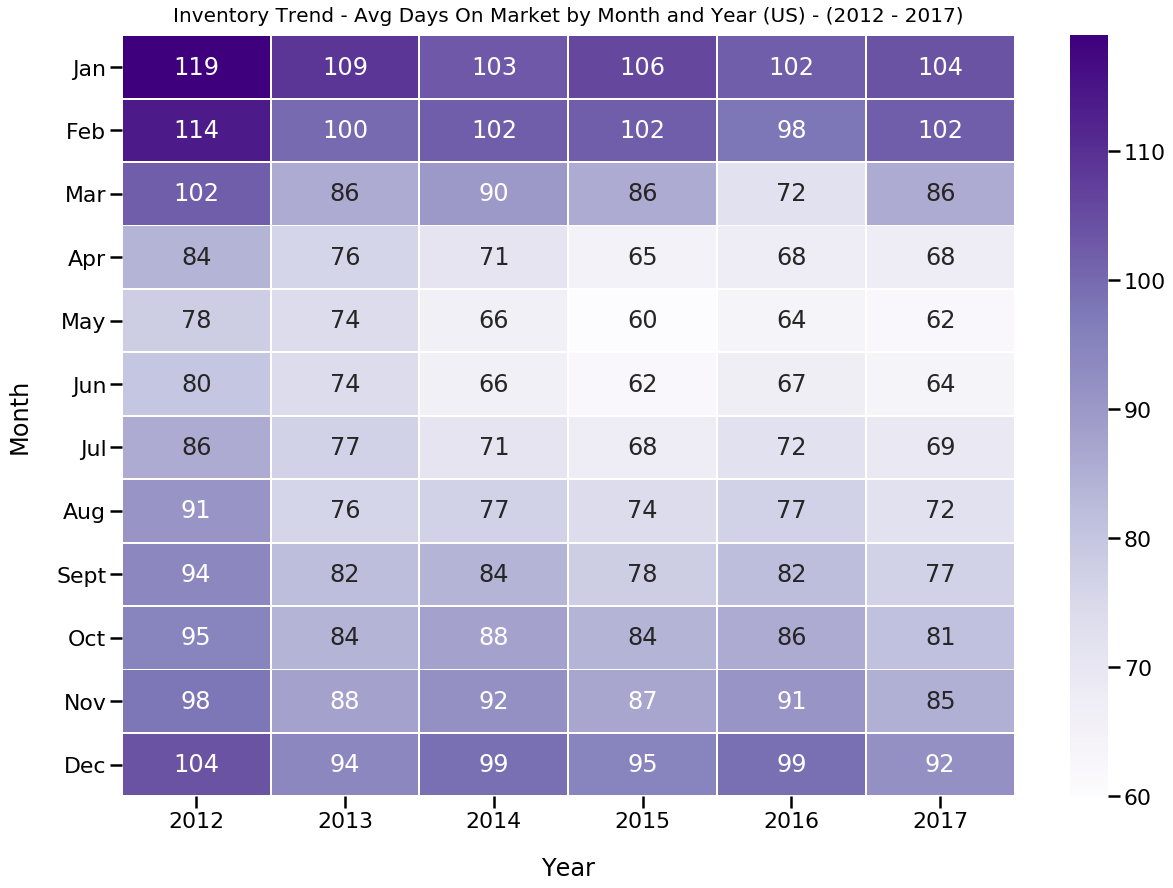

In [795]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(20,14))
ax = sns.heatmap(dfDOMbyYrMon, annot=True, linewidths=.9, ax=ax,fmt="0.0f", yticklabels=month_short_names, xticklabels=year_short_names, cmap="Purples")
ax.axes.set_title("Inventory Trend - Avg Days On Market by Month and Year (US) - (2012 - 2017)", fontsize=20, y=1.01)
ax.set(xlabel='Year', ylabel='Month');
# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0)
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25
plt.show()